<a href="https://colab.research.google.com/github/guruprashanth2004/Deep-Learning-Based-Binary-Classification-of-Industrial-Equipment-Images/blob/main/Deep_Learning_Based_Binary_Classification_of_Industrial_Equipment_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"guruprashanth04","key":"5d35b80076129dd4e16ee17b0f3f66cb"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                        title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
bhadramohit/customer-shopping-latest-trends-dataset        Customer Shopping (Latest Trends) Dataset           76KB  2024-11-23 15:26:12           7856        145  1.0              
malaiarasugraj/global-health-statistics                    Global Health Statistics                            44MB  2024-11-27 10:52:27           2084         27  1.0              
mujtabamatin/air-quality-and-pollution-assessment          Air Quality and Pollution Assessment                84KB  2024-12-04 15:29:51           2362         43  1.0              
hopesb/student-depression-dataset                          Student Depression Dataset.    

In [ ]:
!kaggle datasets download endofnight17j03/industry-defect-dataset

Dataset URL: https://www.kaggle.com/datasets/endofnight17j03/industry-defect-dataset
License(s): apache-2.0
 97% 131M/135M [00:01<00:00, 119MB/s] 
100% 135M/135M [00:01<00:00, 121MB/s]


In [ ]:
!unzip industry-defect-dataset.zip

Archive:  industry-defect-dataset.zip
  inflating: Industrial-Equipment/Defected/bearingfailures-1.png  
  inflating: Industrial-Equipment/Defected/bearingfailures-2.png  
  inflating: Industrial-Equipment/Defected/bearingfailures.png  
  inflating: Industrial-Equipment/Defected/cable-1.jpg  
  inflating: Industrial-Equipment/Defected/cable.jpg  
  inflating: Industrial-Equipment/Defected/cast_def_0_0.jpeg  
  inflating: Industrial-Equipment/Defected/cast_def_0_100.jpeg  
  inflating: Industrial-Equipment/Defected/cast_def_0_102.jpeg  
  inflating: Industrial-Equipment/Defected/cast_def_0_114.jpeg  
  inflating: Industrial-Equipment/Defected/cast_def_0_1493.jpeg  
  inflating: Industrial-Equipment/Defected/cast_def_0_1495.jpeg  
  inflating: Industrial-Equipment/Defected/cast_def_0_1532.jpeg  
  inflating: Industrial-Equipment/Defected/cast_def_0_1533.jpeg  
  inflating: Industrial-Equipment/Defected/cast_def_0_1534.jpeg  
  inflating: Industrial-Equipment/Defected/cast_def_0_1547.jpeg

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/Industrial-Equipment',target_size=(128, 128),batch_size=32,class_mode='binary',  subset='training')

Found 3522 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    '/content/Industrial-Equipment',
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 879 images belonging to 2 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


111/111 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6978 - loss: 0.5829 - val_accuracy: 0.6280 - val_loss: 0.9744
Epoch 2/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.9041 - loss: 0.2158 - val_accuracy: 0.6291 - val_loss: 2.7001
Epoch 3/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9523 - loss: 0.1286 - val_accuracy: 0.6416 - val_loss: 1.5799
Epoch 4/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 154s 1s/step - accuracy: 0.9636 - loss: 0.0966 - val_accuracy: 0.6439 - val_loss: 1.6954
Epoch 5/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 138s 1s/step - accuracy: 0.9774 - loss: 0.0667 - val_accuracy: 0.6325 - val_loss: 3.0929
Epoch 6/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9795 - loss: 0.0604 - val_accuracy: 0.6803 - val_loss: 0.7783
Epoch 7/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9772 - loss: 0.0774 - val_accuracy: 0.6359 - val_loss: 2.7054
Epoch 8/10
111/111 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.9891 - loss: 0.0278 - val_accuracy: 0.673

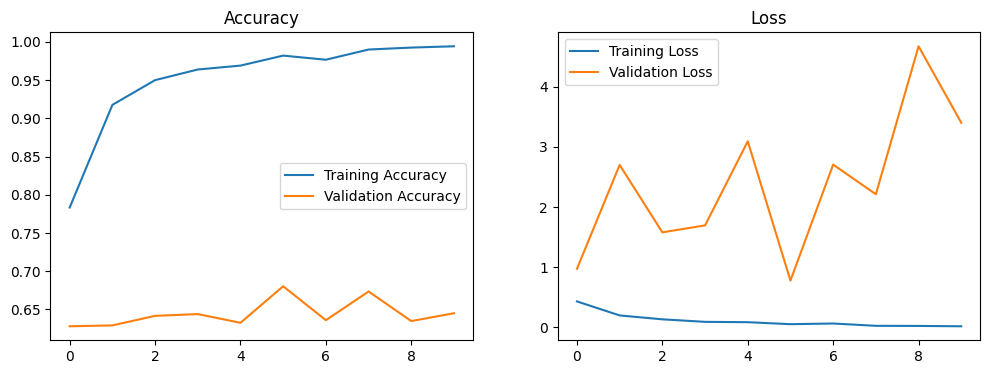

In [23]:
# Plotting the training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()

In [ ]:
validation_generator.reset()
Y_pred = model.predict(validation_generator)
y_pred = (Y_pred > 0.5).astype(int)

28/28 ━━━━━━━━━━━━━━━━━━━━ 11s 379ms/step


In [24]:
# Classification Report
print("Classification Report:")
print(classification_report(validation_generator.classes, y_pred, target_names=['Non-defective', 'Defective']))

Classification Report:
               precision    recall  f1-score   support

Non-defective       0.58      0.93      0.72       514
    Defective       0.36      0.05      0.10       365

     accuracy                           0.57       879
    macro avg       0.47      0.49      0.41       879
 weighted avg       0.49      0.57      0.46       879



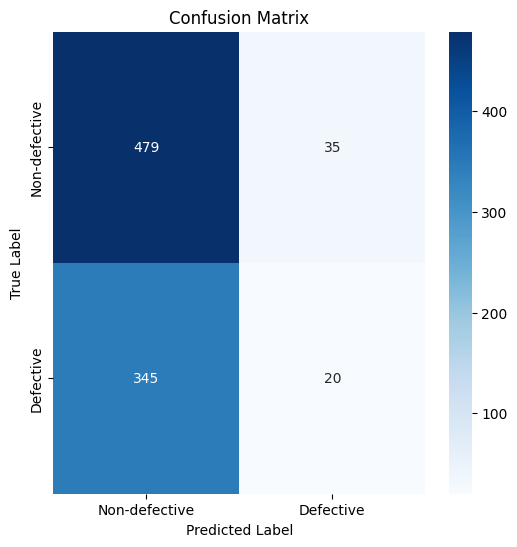

In [ ]:
# Confusion Matrix
cm = confusion_matrix(validation_generator.classes, y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-defective', 'Defective'], yticklabels=['Non-defective', 'Defective'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save('defective_classifier_model.keras')

Testing

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from google.colab import files

# Load the saved model
model = load_model('defective_classifier_model.keras')

# Upload an image file
print("Please upload an image file...")
uploaded = files.upload()

# Extract the file name
image_path = list(uploaded.keys())[0]

# Function to preprocess and predict a single image
def classify_image(image_path):
    # Load the image
    img = load_img(image_path, target_size=(128, 128))  # Ensure the size matches the training size
    img_array = img_to_array(img)  # Convert image to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize pixel values to 0-1

    # Predict the class
    prediction = model.predict(img_array)

    # Interpret the result
    if prediction[0] > 0.5:
        print(f"The image is classified as: Defective (Probability: {prediction[0][0]:.2f})")
    else:
        print(f"The image is classified as: Non-defective (Probability: {1 - prediction[0][0]:.2f})")

# Test the uploaded image
classify_image(image_path)


Please upload an image file...


Saving board.jpeg to board.jpeg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
The image is classified as: Defective (Probability: 1.00)
